# Stock data analysis


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
%matplotlib inline

In [3]:
pip install vnstock

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install mplfinance

# Get data from stock market

In [5]:
from vnstock import *

In [6]:
mbb =  stock_historical_data(symbol='MBB', start_date="2019-01-01", end_date='2023-03-02')
tcb = stock_historical_data(symbol='TCB', start_date="2019-01-01", end_date='2023-03-02')
vpb = stock_historical_data(symbol='VPB', start_date="2019-01-01", end_date='2023-03-02')
acb = stock_historical_data(symbol='ACB', start_date="2019-01-01", end_date='2023-03-02')
ctg = stock_historical_data(symbol='CTG', start_date="2019-01-01", end_date='2023-03-02')
vcb = stock_historical_data(symbol='VCB', start_date="2019-01-01", end_date='2023-03-02')
bid = stock_historical_data(symbol='BID', start_date="2019-01-01", end_date='2023-03-02')
tpb = stock_historical_data(symbol='TPB', start_date="2019-01-01", end_date='2023-03-02')
stb = stock_historical_data(symbol='STB', start_date="2019-01-01", end_date='2023-03-02')

In [7]:
stb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Open         1039 non-null   float64       
 1   High         1039 non-null   float64       
 2   Low          1039 non-null   float64       
 3   Close        1039 non-null   float64       
 4   Volume       1039 non-null   int64         
 5   TradingDate  1039 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 48.8 KB


In [37]:
stb.head()

,Open,High,Low,Close,Volume,TradingDate
0,12000.0,12050.0,11600.0,11600.0,3858970,2019-01-02
1,11500.0,11650.0,11100.0,11100.0,6284880,2019-01-03
2,11000.0,11350.0,10900.0,11150.0,3828780,2019-01-04
3,11400.0,11600.0,11350.0,11500.0,3702750,2019-01-07
4,11500.0,11500.0,11300.0,11350.0,1572220,2019-01-08


In [8]:
# Set TradingDate as index
mbb_df= mbb.set_index("TradingDate")
tcb_df= tcb.set_index("TradingDate")
vpb_df= vpb.set_index("TradingDate")
acb_df= acb.set_index("TradingDate")
ctg_df= ctg.set_index("TradingDate")
vcb_df= vcb.set_index("TradingDate")
bid_df= bid.set_index("TradingDate")
tpb_df= tpb.set_index("TradingDate")
stb_df= stb.set_index("TradingDate")

In [9]:
stb_df.head()

,Open,High,Low,Close,Volume
TradingDate,,,,,
2019-01-02,12000.0,12050.0,11600.0,11600.0,3858970
2019-01-03,11500.0,11650.0,11100.0,11100.0,6284880
2019-01-04,11000.0,11350.0,10900.0,11150.0,3828780
2019-01-07,11400.0,11600.0,11350.0,11500.0,3702750
2019-01-08,11500.0,11500.0,11300.0,11350.0,1572220


In [10]:
#Concatnate data
list_banks = ['MBB', 'TCB', 'VPB', 'ACB', 'CTG', 'VCB', 'BID','TPB', 'STB']

In [38]:
bank_stocks = pd.concat([mbb_df,tcb_df,vpb_df, acb_df, ctg_df, vcb_df, bid_df, tpb_df, stb_df],axis=1, keys = list_banks)
bank_stocks.columns.names = ['Bank Name','Stock Info']
bank_stocks.head()

Bank Name       MBB                                       TCB           \
Stock Info     Open    High     Low   Close   Volume     Open     High   
TradingDate                                                              
2019-01-02   9434.0  9531.0  9361.0  9361.0  3645490  26000.0  26050.0   
2019-01-03   9386.0  9386.0  8950.0  8950.0  8560650  25700.0  25750.0   
2019-01-04   8902.0  9144.0  8733.0  8999.0  6057970  25000.0  25000.0   
2019-01-07   9192.0  9313.0  9144.0  9168.0  4139200  25150.0  25500.0   
2019-01-08   9192.0  9241.0  9071.0  9120.0  3172190  25150.0  25200.0   

Bank Name                               ...      TPB                    \
Stock Info       Low    Close   Volume  ...     Open     High      Low   
TradingDate                             ...                              
2019-01-02   25600.0  25600.0  1329030  ...  12307.0  12307.0  11822.0   
2019-01-03   25000.0  25000.0  1811430  ...  12065.0  12307.0  11731.0   
2019-01-04   23250.0  24950.0  2970830  ...  11822.0  11822.0  11337.0   
2019-01-07   25100.0  25100.0  1436930  ...  12186.0  12277.0  11792.0   
2019-01-08   25050.0  25100.0   843170  ...  12004.0  12186.0  11852.0   

Bank Name                         STB                                      
Stock Info     Close  Volume     Open     High      Low    Close   Volume  
TradingDate                                                                
2019-01-02   12095.0  101860  12000.0  12050.0  11600.0  11600.0  3858970  
2019-01-03   11822.0   87800  11500.0  11650.0  11100.0  11100.0  6284880  
2019-01-04   11792.0  163350  11000.0  11350.0  10900.0  11150.0  3828780  
2019-01-07   11913.0  100710  11400.0  11600.0  11350.0  11500.0  3702750  
2019-01-08   11943.0  144900  11500.0  11500.0  11300.0  11350.0  1572220  

[5 rows x 45 columns]

# Calculate percentage change per day

In [50]:
value_banks = pd.DataFrame()
for name in list_banks:
    value_banks[name+' value_bank'] = bank_stocks[name]['Close'].pct_change()
value_banks_new= value_banks[1:]
set_1 = value_banks_new.iloc[:,:4]
set_1

,MBB value_bank,TCB value_bank,VPB value_bank,ACB value_bank
TradingDate,,,,
2019-01-03,-0.043906,-0.023438,-0.020596,-0.037623
2019-01-04,0.005475,-0.002000,-0.002700,0.007048
2019-01-07,0.018780,0.006012,0.015957,0.014184
2019-01-08,-0.005236,0.000000,-0.005189,-0.006993
2019-01-09,0.026425,0.027888,0.000000,0.017513
...,...,...,...,...
2023-02-24,-0.024793,-0.025045,-0.022792,-0.031496
2023-02-27,-0.025424,-0.009174,-0.008746,-0.014228
2023-02-28,0.000000,-0.018519,0.002941,0.006186


# Pair-wise relationships between daily closed price of selected bank stock

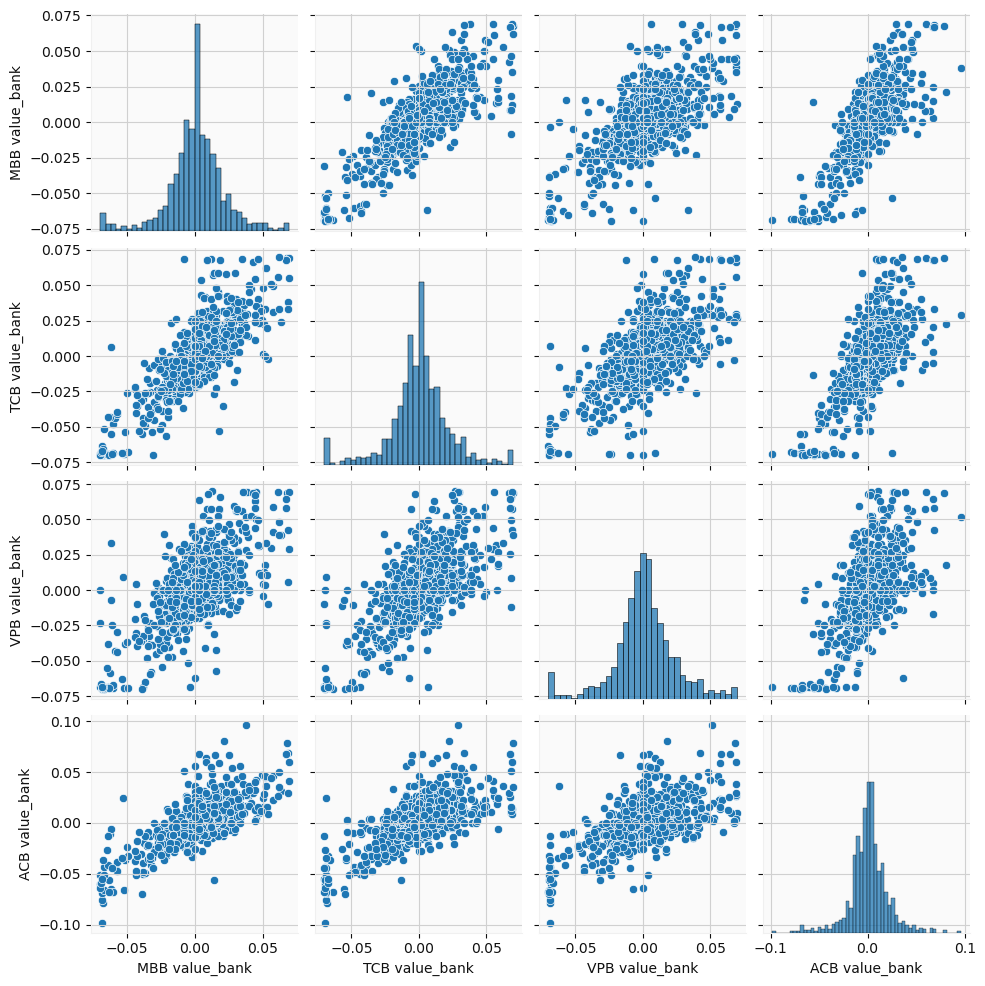

In [51]:
sns.pairplot(set_1);

# Distribution of daily percentage change of MBB stock'price

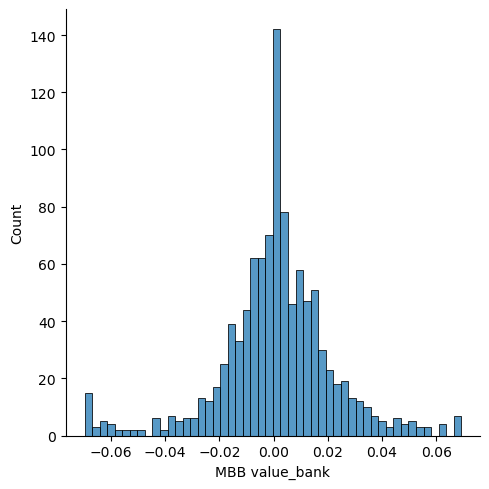

In [15]:
sns.displot(value_banks_new['MBB value_bank'],bins=50);

<AxesSubplot:xlabel='MBB value_bank', ylabel='Density'>

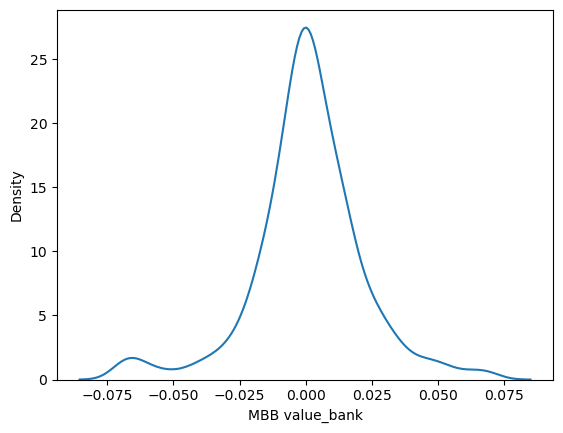

In [16]:
sns.kdeplot(data= value_banks_new['MBB value_bank'])

# Drawing price of bank stock

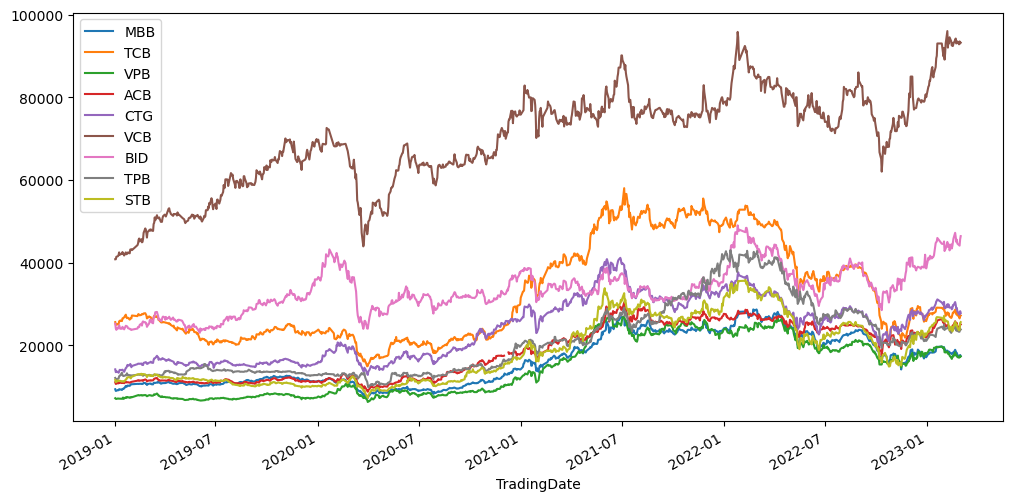

In [17]:
for tick in list_banks:
    bank_stocks[tick]['Close'].plot(figsize=(12,6),x="TradingDate", label=tick);
plt.legend();

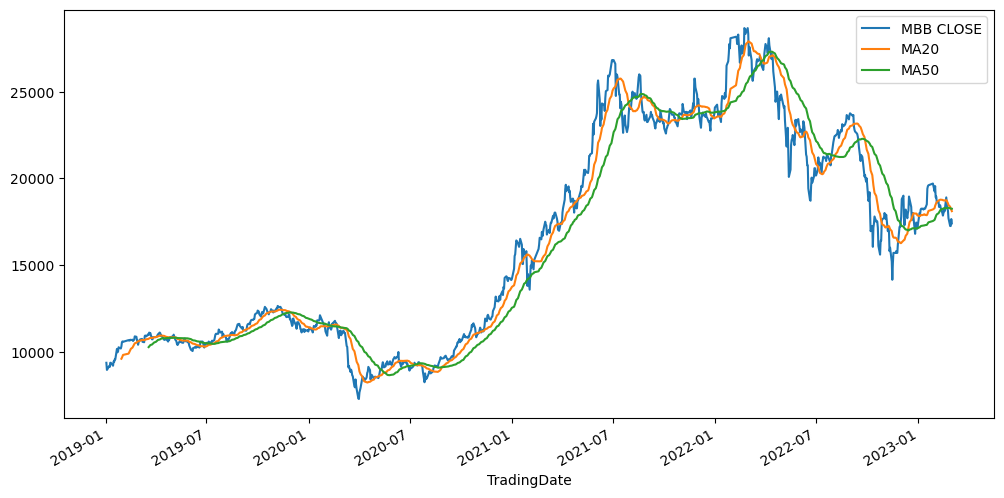

In [18]:
plt.figure(figsize=(12,6))
mbb_df['Close'].plot(label='MBB CLOSE')
mbb_df['Close'].rolling(window=20).mean().plot(label='MA20')
mbb_df['Close'].rolling(window=50).mean().plot(label='MA50')
plt.legend();

In [19]:
bank_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
bank_corr2 = bank_corr.iloc[1:, :-1]
bank_corr2

Bank Name,MBB,TCB,VPB,ACB,CTG,VCB,BID,TPB
Bank Name,,,,,,,,
TCB,0.925972,1.000000,0.921002,0.878359,0.892831,0.656553,0.469351,0.868035
VPB,0.974211,0.921002,1.000000,0.970774,0.931254,0.795957,0.617558,0.919528
ACB,0.962472,0.878359,0.970774,1.000000,0.951439,0.852643,0.668117,0.904097
CTG,0.907829,0.892831,0.931254,0.951439,1.000000,0.849215,0.684254,0.837101
VCB,0.800465,0.656553,0.795957,0.852643,0.849215,1.000000,0.877742,0.746772
BID,0.638791,0.469351,0.617558,0.668117,0.684254,0.877742,1.000000,0.639688
TPB,0.946701,0.868035,0.919528,0.904097,0.837101,0.746772,0.639688,1.000000
STB,0.967258,0.924947,0.964659,0.962721,0.945510,0.799728,0.662992,0.933892


In [20]:
one_corr = np.ones_like(bank_corr, dtype= bool)
mask = np.triu(one_corr)
mask2= mask[1:,:-1]
mask2

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

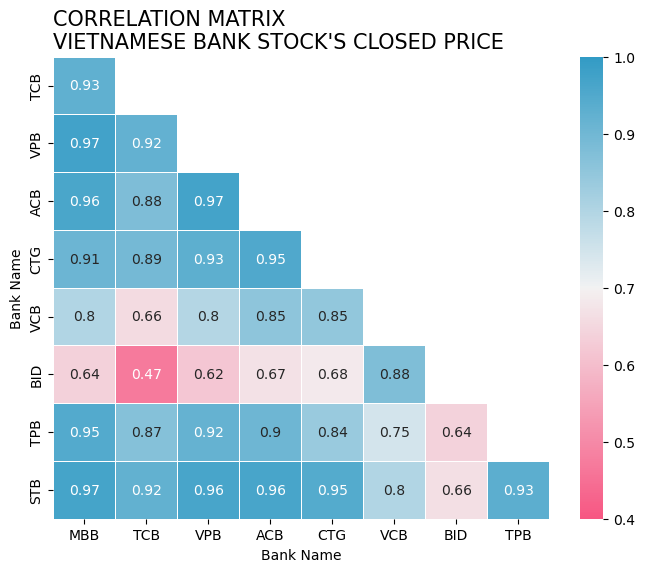

In [21]:
fig, ax= plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data= bank_corr2, mask= mask2,
            annot= True, cmap = cmap,
           vmin=0.4, vmax=1, linewidths=0.7)

tittle="CORRELATION MATRIX\nVIETNAMESE BANK STOCK'S CLOSED PRICE"
ax.set_title(tittle, loc= 'left', fontsize=15);

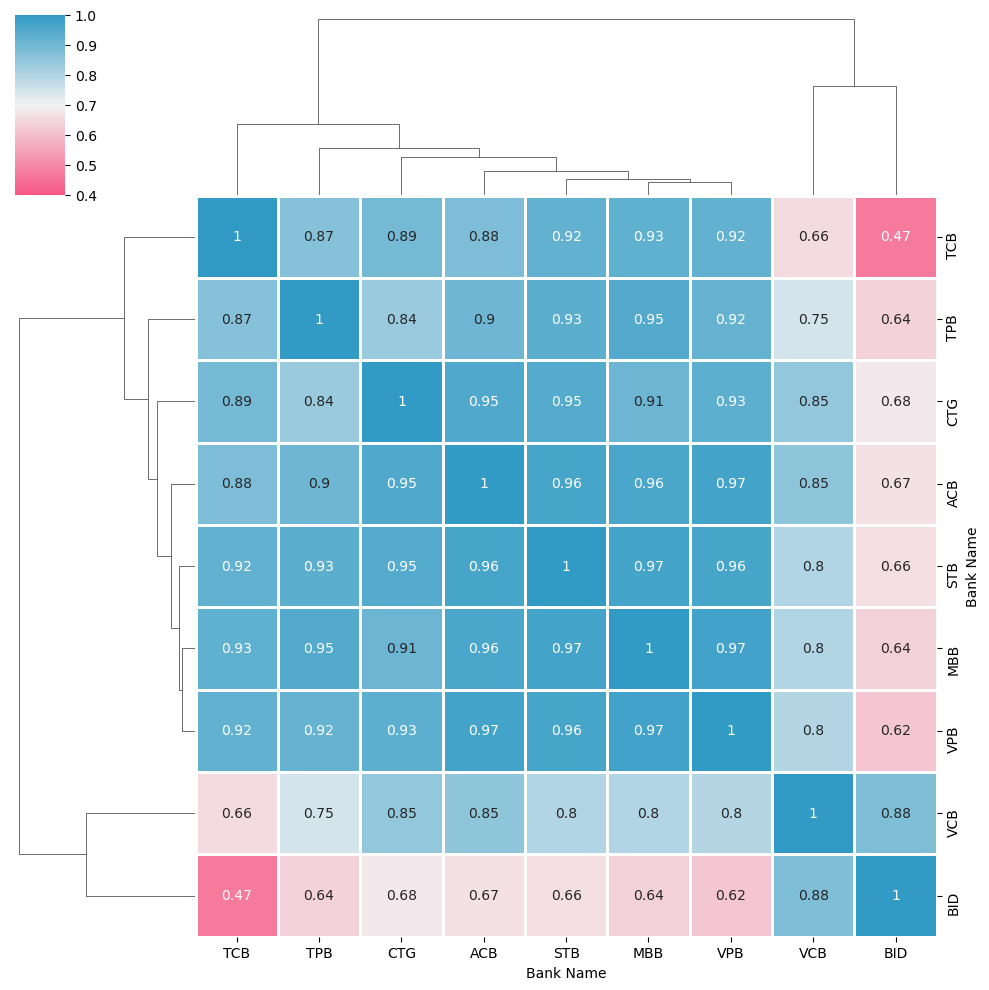

In [22]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),
            annot=True,
            cmap=cmap,
            vmin=0.4, vmax=1,
            linecolor="white", linewidths= 0.8
           );

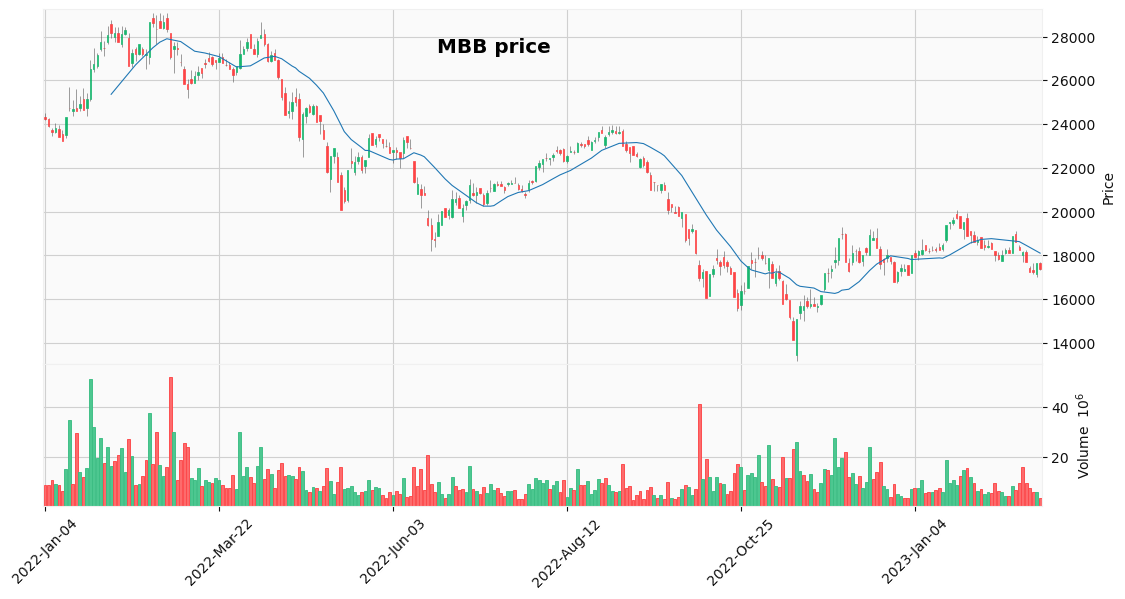

In [23]:
mpf.plot(mbb_df['2022-01-01':'2023-03-02'],
         type='candle',mav=(20),
         figratio=(40,20), title= "MBB price", 
         volume= True, 
         style='yahoo', tight_layout= True);